# SCC0570 - Introdução a Redes Neurais
## Instituto de Ciências Matemáticas e Computação - Unversidade de São Paulo

* Alef Segura Santos, 9762942
* Gustavo de Moura Souza, 9762981

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import util
from RBFNet import RBFNet
from MLP import MLP

### Leitura e Preparação dos Dados

In [2]:
# Leitura do csv
df = pd.read_csv('datasets/semeion.data', sep=' ', lineterminator='\n')
print(df.shape)

# Preparação do dataset
digitos = util.prepara_dataset(df, 10)

(1592, 266)


# Treinamento dos Modelos
### MLP

In [11]:
%%time
mlp = MLP(hidden_units=[20],  learning_rate=0.5)
mlp.fit(digitos, n_classes=10, train_size=0.7, delta_error=0.01)
print('Acurácia:', mlp.score())

Last epoch: 86 | Error: 13.700324649394839
Acurácia: 0.8891213389121339
Wall time: 19.1 s


### RBF
#### Cálculo dos centróides

In [4]:
k = 150
km = KMeans(k).fit(digitos.X)
centroides = km.cluster_centers_

#### Instanciação da Rede

In [12]:
%%time
rbf = RBFNet(eta=1, sigma=3.2, hidden_units=k)
rbf.fit(digitos, n_classes=10, clusters=centroides, train_size=0.7, delta_error=0.01)
print('Acurácia:', rbf.score())

Last epoch: 23 | Error: 0.10817315071431818
Acurácia: 0.9020100502512562
Wall time: 1min 1s


# Comparação

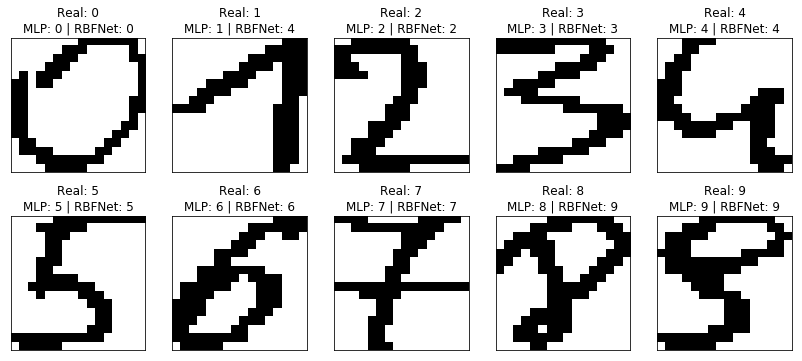

In [14]:
# Separa amostras de cada dígito
sample = util.sample(digitos)

# Resultado
plt.figure(figsize=(14,6))

for s in sample:
    # Amostra aleatória
    rand = np.random.randint(0, len(sample[s]))
    pred_mlp = mlp.predict(sample[s][rand])
    pred_rbf = rbf.predict(sample[s][rand])
    
    # Mostrando resultado
    plt.subplot(2,5,int(s)+1)
    plt.imshow(sample[s][rand].reshape(16,16), cmap='binary')
    plt.title('Real: {}\nMLP: {} | RBFNet: {}'.format(s, pred_mlp, pred_rbf))
    plt.xticks([])
    plt.yticks([])
    
plt.show()